In [86]:
import numpy as np
import scipy.linalg
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

In [87]:
from general_graph_utils import *

# Generate random graphs

In [89]:
def random_graph(n):
    """
    Randomly generates a linear framework graph -- a finite, directed graph with no self-loops -- that is strongly connected and fully reversible. 
    The size of the graph is randomly determined from range (2, n), and the edges are added by randomly selecting a pair of nodes in G.
    
    Parameters
    ----------
    n : integer
        the maximum number of vertices
    
    Returns
    -------
    G : NetworkX DiGraph object
        directed graph
    
    G_ud : NetworkX Graph object
        undirected graph
    """
    
    G = nx.DiGraph()
    G_ud = nx.Graph()
    
    # determine the number of nodes in G
    G_size = np.random.choice(np.arange(2,n), size=1)
    
    # add nodes to G and G_ud
    nodes = np.arange(1,G_size+1,step=1)
    G.add_nodes_from(nodes)
    G_ud.add_nodes_from(nodes)
    
    # add edges until the graph is strongly connected
    while nx.is_strongly_connected(G) == False:
        u, v = np.random.choice(nodes, size=2,replace=False)
        G.add_edge(u,v)
        G_ud.add_edge(u,v)
    
    # add edges such that the graph is fully reversible
    for edge in G.edges:
        u = edge[0]
        v = edge[1]
        if G.has_edge(v,u) == False:
            G.add_edge(v,u)
            G_ud.add_edge(v,u)
    
    return G, G_ud

In [81]:
n = 10 

G = nx.DiGraph()
G_ud = nx.Graph()

# determine the number of nodes in G
G_size = np.random.choice(np.arange(2,n), size=1)

# add nodes to G and G_ud
nodes = np.arange(1,G_size+1,step=1)
G.add_nodes_from(nodes)
G_ud.add_nodes_from(nodes)

print(G_size)
print(nodes)
print(G)
print(nx.is_strongly_connected(G))

[8]
[1 2 3 4 5 6 7 8]
DiGraph with 8 nodes and 0 edges
False


In [82]:
while nx.is_strongly_connected(G) == False:
    u, v = np.random.choice(nodes, size=2,replace=False)
    G.add_edge(u,v)
    G_ud.add_edge(u,v)
    print(G)

DiGraph with 8 nodes and 1 edges
DiGraph with 8 nodes and 2 edges
DiGraph with 8 nodes and 3 edges
DiGraph with 8 nodes and 4 edges
DiGraph with 8 nodes and 5 edges
DiGraph with 8 nodes and 6 edges
DiGraph with 8 nodes and 7 edges
DiGraph with 8 nodes and 8 edges
DiGraph with 8 nodes and 9 edges
DiGraph with 8 nodes and 10 edges
DiGraph with 8 nodes and 11 edges
DiGraph with 8 nodes and 12 edges
DiGraph with 8 nodes and 13 edges
DiGraph with 8 nodes and 13 edges
DiGraph with 8 nodes and 14 edges
DiGraph with 8 nodes and 15 edges
DiGraph with 8 nodes and 16 edges
DiGraph with 8 nodes and 17 edges
DiGraph with 8 nodes and 18 edges
DiGraph with 8 nodes and 18 edges
DiGraph with 8 nodes and 19 edges
DiGraph with 8 nodes and 20 edges
DiGraph with 8 nodes and 21 edges
DiGraph with 8 nodes and 21 edges
DiGraph with 8 nodes and 21 edges
DiGraph with 8 nodes and 22 edges
DiGraph with 8 nodes and 23 edges
DiGraph with 8 nodes and 24 edges
DiGraph with 8 nodes and 24 edges
DiGraph with 8 nodes an

In [83]:
for edge in G.edges:
    u = edge[0]
    v = edge[1]
    if G.has_edge(v,u) == False:
        G.add_edge(v,u)
        print(G)

DiGraph with 8 nodes and 26 edges
DiGraph with 8 nodes and 27 edges
DiGraph with 8 nodes and 28 edges
DiGraph with 8 nodes and 29 edges
DiGraph with 8 nodes and 30 edges
DiGraph with 8 nodes and 31 edges
DiGraph with 8 nodes and 32 edges


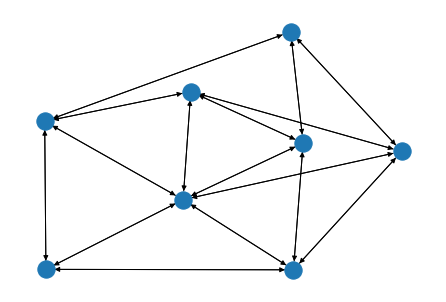

In [84]:
nx.draw(G)

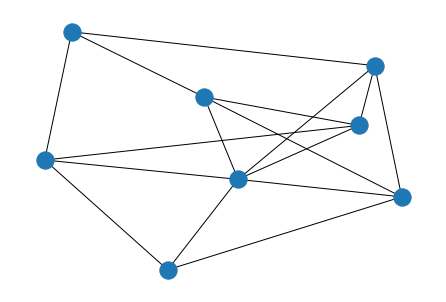

In [85]:
nx.draw(G_ud)

In [4]:
G, G_ud = random_graph(n=10)

print(G)
print(G_ud)

DiGraph with 3 nodes and 0 edges
Graph with 3 nodes and 0 edges


# Create directed and undirected versions of the graphs

In [13]:
G_3state = nx.DiGraph()
G_3state.add_nodes_from([1,2,3])
G_3state.add_edges_from([(1,2),(2,1),(2,3),(3,2),(3,1),(1,3)])

In [14]:
G_3state_ud = nx.Graph()
G_3state_ud.add_nodes_from([1,2,3])
G_3state_ud.add_edges_from([(1,2),(2,1),(2,3),(3,2),(3,1),(1,3)])

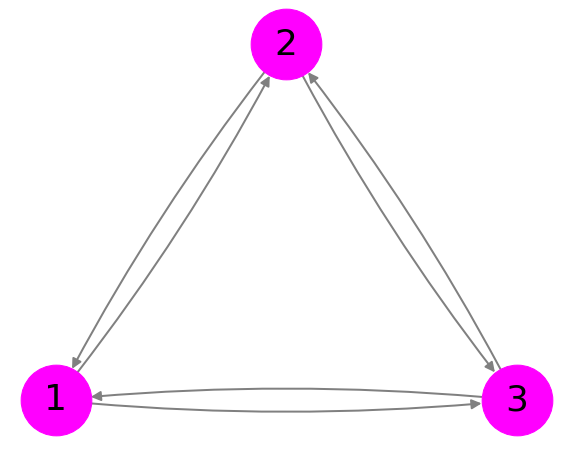

In [15]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-1, 3), 2:(0.5, 6), 3: (2, 3)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "magenta",
    "edge_color": "grey",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_3state, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_3state.png')

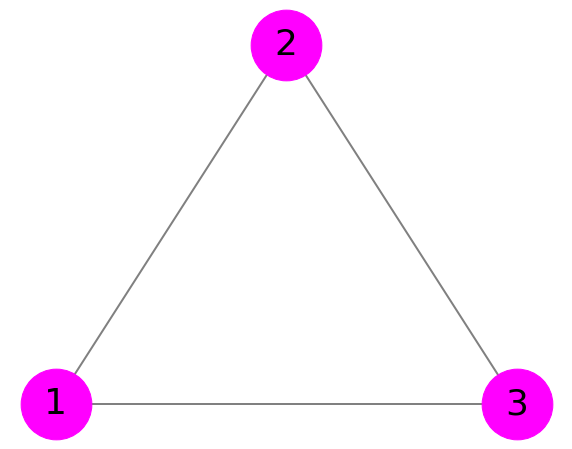

In [16]:
plt.rc("figure",figsize=(10,8))

pos = {1: (-1, 3), 2:(0.5, 6), 3: (2, 3)}

options = {
    "with_labels": True,
    "font_size": 36,
    "node_size": 5000,
    "node_color": "magenta",
    "edge_color": "grey",
    "arrowsize": 20,
    'width': 2,
    "connectionstyle": 'arc3, rad = 0.05'
}

fig, ax = plt.subplots()
nx.draw_networkx(G_3state_ud, pos, **options)

ax.set_facecolor('white')
ax.axis('off')
fig.set_facecolor('white')
plt.show()
fig.savefig('G_3state_ud.png')

# Extract node, edge, weight, and cycle information from the graph

In [253]:
node_list_3state = get_nodes(G_3state)

In [254]:
edge_list_3state = get_edges(G_3state)

In [255]:
weight_dict_3state, weight_list_3state = get_weights(G_3state)

In [256]:
cycle_list_3state = get_cycle_nodes(G_3state_ud)

In [257]:
num_cycles = len(cycle_list_3state)
num_nodes = len(node_list_3state)
num_edges = len(edge_list_3state)

In [258]:
print(node_list_3state)

[1 2 3]


In [259]:
print(edge_list_3state)

[[1 2]
 [1 3]
 [2 1]
 [2 3]
 [3 2]
 [3 1]]


In [260]:
print(weight_dict_3state)

{(1, 2): 14.298665224666129, (1, 3): 0.0073275940626102475, (2, 1): 0.24413863528137836, (2, 3): 693.7147839840545, (3, 2): 5.129670514003489, (3, 1): 0.1396106683005234}


In [261]:
print(weight_list_3state)

[1.42986652e+01 7.32759406e-03 2.44138635e-01 6.93714784e+02
 5.12967051e+00 1.39610668e-01]


In [262]:
print(cycle_list_3state)

[[1, 2, 3]]


# Obtain the corresponding edge and weight information for each cycle

In [263]:
cycle_edges_forward_3state, cycle_edges_backward_3state, cycle_weights_forward_3state, cycle_weights_backward_3state = get_cycle_weights_edges(G_3state_ud,cycle_list_3state,weight_dict_3state)

In [264]:
print(cycle_edges_forward_3state)

[[(1, 2), (2, 3), (3, 1)]]


In [265]:
print(cycle_edges_backward_3state)

[[(2, 1), (3, 2), (1, 3)]]


In [266]:
print(cycle_weights_forward_3state)

[[14.298665224666129, 693.7147839840545, 0.1396106683005234]]


In [267]:
print(cycle_weights_backward_3state)

[[0.24413863528137836, 5.129670514003489, 0.0073275940626102475]]


# Calculate the affinities for each cycle in the graph

In [268]:
affinities_f_3state, affinities_b_3state = calculate_cycle_products(cycle_weights_forward_3state,cycle_weights_backward_3state)

In [269]:
print(affinities_f_3state)

[1384.82550684]


In [270]:
print(affinities_b_3state)

[0.00917672]


In [271]:
total_affinities_3state = calculate_affinities(affinities_f_3state, affinities_b_3state, cycle_list_3state)

In [272]:
print(total_affinities_3state)

[11.92441508]


# Calculate the Laplacian matrix

In [273]:
L_3state = Laplacian_all(edge_list_3state,weight_list_3state,num_nodes,num_edges)

In [274]:
print(weight_dict_3state)

{(1, 2): 14.298665224666129, (1, 3): 0.0073275940626102475, (2, 1): 0.24413863528137836, (2, 3): 693.7147839840545, (3, 2): 5.129670514003489, (3, 1): 0.1396106683005234}


In [275]:
print(L_3state)

[[-3.83749304e-01  1.42986652e+01  7.32759406e-03]
 [ 2.44138635e-01 -1.94283357e+01  6.93714784e+02]
 [ 1.39610668e-01  5.12967051e+00 -6.93722112e+02]]


# Calculate higher-order autocorrelation functions

In [276]:
N = 10000
observable = [3, 5, 7]
tau_n = np.around(np.arange(0.01,2.0,step=.01), decimals = 2)

In [277]:
t, t_rev = NG_III_autocorrelation_analytical(observable,L_3state,tau_n,alpha=1,beta=3)

In [278]:
area = np.abs(np.trapz(t)-np.trapz(t_rev))
print(area)

0.2830559558024106


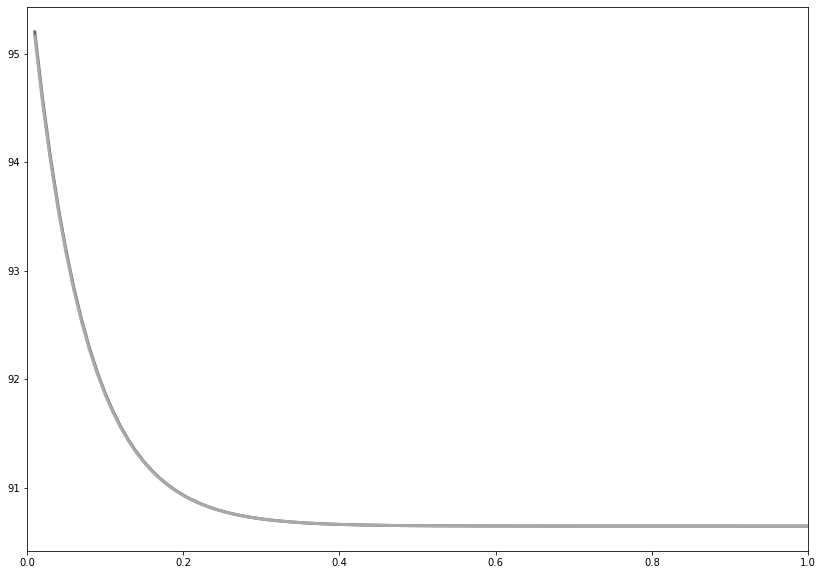

In [279]:
fig, ax = plt.subplots(figsize = (14, 10))
plt.plot(tau_n,t, color='dimgray',linewidth=3)
plt.plot(tau_n,t_rev, color='darkgray',linewidth=3)
plt.xlim(0,1)
fig.savefig("autocorrelation_general_3state_1")

# Calculate area distribution

In [34]:
forces = np.zeros((N,1))
areas = np.zeros((N,1))
params_eq = np.zeros((N,6))
areas_eq = np.zeros((N,1))
affinities_eq = np.zeros((N,1))
sanity_check = np.zeros((N,1))

In [35]:
for i in tqdm(range(0,N)):
    weight_dict_3state, weight_list_3state = get_weights(G_3state)
    cycle_edges_forward_3state, cycle_edges_backward_3state, cycle_weights_forward_3state, cycle_weights_backward_3state = get_cycle_weights_edges(G_3state_ud,cycle_list_3state,weight_dict_3state)
    affinities_f_3state, affinities_b_3state = calculate_cycle_products(cycle_weights_forward_3state,cycle_weights_backward_3state)
    total_affinities_3state = calculate_affinities(affinities_f_3state, affinities_b_3state, cycle_list_3state)
    forces[i] = total_affinities_3state
    L_3state = Laplacian_all(edge_list_3state,weight_list_3state,num_nodes,num_edges)
    t, t_rev = NG_III_autocorrelation_analytical(observable,L_3state,tau_n,alpha=1,beta=3)
    areas[i] = np.abs(np.trapz(t)-np.trapz(t_rev))

100%|█████████████████████████████████████| 10000/10000 [05:33<00:00, 29.99it/s]


In [36]:
for i in tqdm(range(0,N)):
    if areas[i]==0:
        params_eq[i][:] = weight_list_3state
        print(forces[i])

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 333689.01it/s]


In [37]:
for i in tqdm(range(0,N)):
    if forces[i]==0:
        print(areas[i])

100%|█████████████████████████████████| 10000/10000 [00:00<00:00, 252208.56it/s]


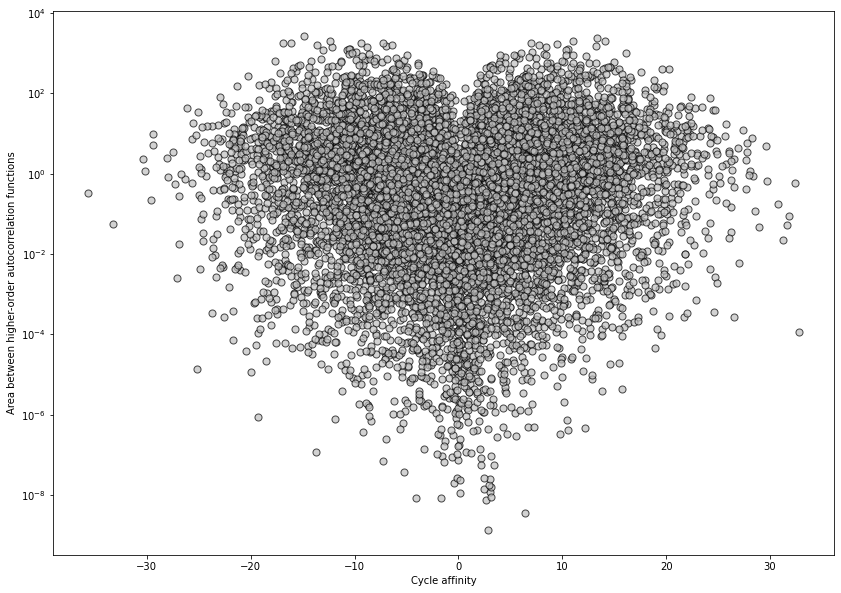

In [40]:
fig, ax = plt.subplots(figsize = (14, 10))
ax.scatter(forces,areas, color='silver',s=50, alpha=0.7, edgecolors="k")
ax.set_yscale("log")
ax.set_ylabel('Area between higher-order autocorrelation functions')
ax.set_xlabel('Cycle affinity')
fig.savefig("heart_plot_4")

In [112]:
np.mean(areas)

21.198115849646378

In [122]:
np.where(areas < 10**-6)[0].size/len(areas)

0.0073

In [123]:
print(np.nonzero(params_eq))

(array([7362, 7362, 7362, 7362, 7362, 7362]), array([0, 1, 2, 3, 4, 5]))


In [89]:
np.nonzero(sanity_check)

(array([], dtype=int64), array([], dtype=int64))

# Force-area curve for 3-state graph

In [168]:
N = 2500
all_affinities = np.zeros((N,num_cycles))
all_areas = np.zeros((N,1))

## Initialize the graph in an equilibrium steady state

In [172]:
num_cycles = len(cycle_list_3state)
edge_tracker = []

# edge (2,5)
cycle_weights_forward_3state[1][1] = (np.prod(cycle_weights_backward_3state[1]))/((cycle_weights_forward_3state[1][0]*cycle_weights_forward_3state[1][2]))
edge_tracker.append(cycle_edges_forward_3state[1][1])

# edge (4,1)
cycle_weights_forward_3state[0][2] = (np.prod(cycle_weights_backward_3state[0]))/((cycle_weights_forward_3state[0][0]*cycle_weights_forward_3state[0][1]))
edge_tracker.append(cycle_edges_forward_3state[0][2])

# edge (2,3)
cycle_weights_forward_3state[2][0] = (np.prod(cycle_weights_backward_3state[2]))/((cycle_weights_forward_3state[2][1]*cycle_weights_forward_3state[2][2]))
edge_tracker.append(cycle_edges_forward_3state[2][0])

IndexError: list index out of range

In [170]:
for i in tqdm(range(0,N)):
    
    # perturb parameter in each cycle
    for cycle in cycle_weights_forward_3state:
        cycle[0] += 1
    
    # calculate and store the cycle affinity for each cycle
    products_f, products_b = calculate_cycle_products(cycle_weights_forward_3state,cycle_weights_backward_3state)
    total_affinities = calculate_affinities(products_f, products_b, cycle_list_3state)
    
    all_affinities[i] = total_affinities
    
    # edit the record of the weights in the graph
    for j in range(num_cycles):
        weight_dict_3state[edge_tracker[j]] = cycle_weights_forward_3state[j][0]
    
    weight_list_3state = np.fromiter(weight_dict_3state.values(), dtype=float)
    
    # calculate the Laplacian
    L_3state = Laplacian_all(edge_list_3state,weight_list_3state,num_nodes,num_edges)
    
    # calculate the autocorrelation functions
    t, t_rev = NG_III_autocorrelation_analytical(observable,L_3state,tau_n,alpha=1,beta=3)
    
    # calculate and store the area between them
    #print(np.abs(np.trapz(t_ex1)-np.trapz(t_rev_ex1)))
    all_areas[i] = np.abs(np.trapz(t)-np.trapz(t_rev))

  0%|                                                  | 0/2500 [00:00<?, ?it/s]


NameError: name 'edge_tracker' is not defined